<a href="https://colab.research.google.com/github/JoyKaihatu/DeepLearningFinals/blob/main/TRAIN_DATASET_MIX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install visualkeras

In [ ]:
# import visualkeras
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import time

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/UAS_DL/CROP_AFTER_SPLIT_MIX'
path2 = '/content/drive/MyDrive/UAS_DL/MODEL_CROP_AFTER_SPLIT_MIX'

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(path+'/train',
                                          target_size=(224,224),
                                          batch_size= 32,
                                          class_mode='categorical')
validation_dataset = validation.flow_from_directory(path+'/val',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical')

Found 4638 images belonging to 30 classes.
Found 558 images belonging to 30 classes.


In [ ]:
train_dataset.filenames

['Alpinia Galanga/AG-S-001.jpg',
 'Alpinia Galanga/AG-S-002.jpg',
 'Alpinia Galanga/AG-S-003.jpg',
 'Alpinia Galanga/AG-S-004.jpg',
 'Alpinia Galanga/AG-S-005.jpg',
 'Alpinia Galanga/AG-S-006.jpg',
 'Alpinia Galanga/AG-S-007.jpg',
 'Alpinia Galanga/AG-S-008.jpg',
 'Alpinia Galanga/AG-S-009.jpg',
 'Alpinia Galanga/AG-S-010.jpg',
 'Alpinia Galanga/AG-S-012.jpg',
 'Alpinia Galanga/AG-S-013.jpg',
 'Alpinia Galanga/AG-S-014.jpg',
 'Alpinia Galanga/AG-S-015.jpg',
 'Alpinia Galanga/AG-S-016.jpg',
 'Alpinia Galanga/AG-S-017.jpg',
 'Alpinia Galanga/AG-S-018.jpg',
 'Alpinia Galanga/AG-S-019.jpg',
 'Alpinia Galanga/AG-S-020.jpg',
 'Alpinia Galanga/AG-S-021.jpg',
 'Alpinia Galanga/AG-S-023.jpg',
 'Alpinia Galanga/AG-S-026.jpg',
 'Alpinia Galanga/AG-S-027.jpg',
 'Alpinia Galanga/AG-S-028.jpg',
 'Alpinia Galanga/AG-S-029.jpg',
 'Alpinia Galanga/AG-S-030.jpg',
 'Alpinia Galanga/AG-S-031.jpg',
 'Alpinia Galanga/AG-S-032.jpg',
 'Alpinia Galanga/AG-S-033.jpg',
 'Alpinia Galanga/AG-S-034.jpg',
 'Alpinia 

In [ ]:
validation_dataset.class_indices

{'Alpinia Galanga': 0,
 'Amaranthus Viridis': 1,
 'Artocarpus Heterophyllus': 2,
 'Azadirachta Indica': 3,
 'Basella Alba': 4,
 'Brassica Juncea': 5,
 'Carissa Carandas': 6,
 'Citrus Limon': 7,
 'Ficus Auriculata': 8,
 'Ficus Religiosa': 9,
 'Hibiscus Rosa': 10,
 'Jasminum': 11,
 'Mangifera Indica': 12,
 'Mentha Piperita': 13,
 'Moringa Oleifera': 14,
 'Muntingia Calabura': 15,
 'Murraya Koenigii': 16,
 'Nerium Oleander': 17,
 'Nyctanthes Arbor Tristis': 18,
 'Ocimum Tenuiflorum': 19,
 'Piper Betle': 20,
 'Plectranthus Amboinicus': 21,
 'Pongamia Pinnata': 22,
 'Psidium Guajava': 23,
 'Punica Granatum': 24,
 'Santalum Album': 25,
 'Syzygium Cumini': 26,
 'Syzygium Jambos': 27,
 'Tabernaemontana Divaricata': 28,
 'Trigonella Foenum Graecum': 29}

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']


    accuracy = history.history['accuracy']


    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")

    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")

    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [ ]:
class DurationCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = tf.timestamp()

    def on_epoch_end(self, epoch, logs=None):
        end_time = tf.timestamp()
        duration = end_time - self.start_time
        logs['duration'] = duration.numpy()
duration_callback = DurationCallback()

In [ ]:
def find_the_value(arr):
    a =  train_dataset.class_indices

    arr = arr.flatten()
    maxs_index = np.argmax(arr)



    for x,y in a.items():
        if y == maxs_index:
            return x

# Model Deep Learn

## VGG16

In [ ]:

model_VGG16=tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)
model_VGG16.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))
x = model_VGG16(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Use global pooling to handle any size
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_VGG16 = tf.keras.models.Model(inputs = input, outputs = x, name = "VGG16")

model_VGG16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_8  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 30)                15390     
                                                             

## Resnet50V2

In [ ]:

model_RESNET50V2 = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)
model_RESNET50V2.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_RESNET50V2(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Use global pooling to handle any size
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_RESNET50V2 = tf.keras.models.Model(inputs = input, outputs = x, name = "ResNet50V2")

model_RESNET50V2.summary()

Model: "ResNet50V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 global_average_pooling2d_9  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               1049088   
                                                                 
 dense_19 (Dense)            (None, 30)                1

## DenseNet201

In [ ]:

model_DenseNet201 = tf.keras.applications.DenseNet201(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_DenseNet201.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_DenseNet201(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_DenseNet201 = tf.keras.models.Model(inputs = input, outputs = x, name = "DenseNet201")

model_DenseNet201.summary()

Model: "DenseNet201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, None, None, 1920   18321984  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 1920)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_10 (Flatten)        (None, 1920)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               983552    
                                                                 
 dense_21 (Dense)            (None, 30)                

## VGG19

In [ ]:


model_VGG19 = tf.keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_VGG19.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_VGG19(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_VGG19 = tf.keras.models.Model(inputs = input, outputs = x, name = "VGG19")

model_VGG19.summary()


Model: "VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
 1 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 30)                15390     
                                                             

## Inception V3

In [ ]:

model_InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_InceptionV3.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_InceptionV3(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_InceptionV3 = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionV3")

model_InceptionV3.summary()

Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 2 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               1049088   
                                                                 
 dense_25 (Dense)            (None, 30)                

## Xception

In [ ]:

model_Xception = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_Xception.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_Xception(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_Xception = tf.keras.models.Model(inputs = input, outputs = x, name = "Xception")

model_Xception.summary()

Model: "Xception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, None, None, 2048   20861480  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dense_27 (Dense)            (None, 30)                153

## InceptionResNetV2

In [ ]:

model_InceptionResNetV2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_InceptionResNetV2.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_InceptionResNetV2(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_InceptionResNetV2 = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionResNetV2")

model_InceptionResNetV2.summary()

Model: "InceptionResNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_14 (Flatten)        (None, 1536)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               786944    
                                                                 
 dense_29 (Dense)            (None, 30)          

## MobileNetV3 Large

In [ ]:

model_MobileNetV3Large = tf.keras.applications.MobileNetV3Large(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_MobileNetV3Large.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_MobileNetV3Large(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_MobileNetV3Large = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionResNetV2")

model_MobileNetV3Large.summary()

Model: "InceptionResNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3large (Function  (None, None, None, 960)   2996352   
 al)                                                             
                                                                 
 global_average_pooling2d_1  (None, 960)               0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_15 (Flatten)        (None, 960)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               492032    
                                                                 
 dense_31 (Dense)            (None, 30)          

# Compile Model

In [ ]:
optimizer = 'adam'
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

In [ ]:
model_VGG16.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_RESNET50V2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_DenseNet201.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_VGG19.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_InceptionV3.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_Xception.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_InceptionResNetV2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_MobileNetV3Large.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Fit Model

In [ ]:
EPOCH = 100
BATCH_SIZE = 32

In [ ]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

CALLBACK = [duration_callback, callback2]

Epoch 1/100
73/73 [==============================] - 3476s 46s/step - loss: 1.5243 - accuracy: 0.5655 - val_loss: 1.2134 - val_accuracy: 0.6828 - duration: 3475.8824
Epoch 2/100
73/73 [==============================] - 93s 1s/step - loss: 0.5555 - accuracy: 0.8351 - val_loss: 1.1811 - val_accuracy: 0.7151 - duration: 93.4643
Epoch 3/100
73/73 [==============================] - 94s 1s/step - loss: 0.3507 - accuracy: 0.8954 - val_loss: 1.1857 - val_accuracy: 0.7204 - duration: 94.3787
Epoch 4/100
73/73 [==============================] - 95s 1s/step - loss: 0.2300 - accuracy: 0.9273 - val_loss: 1.1393 - val_accuracy: 0.7168 - duration: 95.1665
Epoch 5/100
73/73 [==============================] - 92s 1s/step - loss: 0.1860 - accuracy: 0.9448 - val_loss: 1.1364 - val_accuracy: 0.7240 - duration: 92.4396
Epoch 6/100
73/73 [==============================] - 94s 1s/step - loss: 0.1482 - accuracy: 0.9513 - val_loss: 0.9827 - val_accuracy: 0.7634 - duration: 93.9405
Epoch 7/100
73/73 [==========

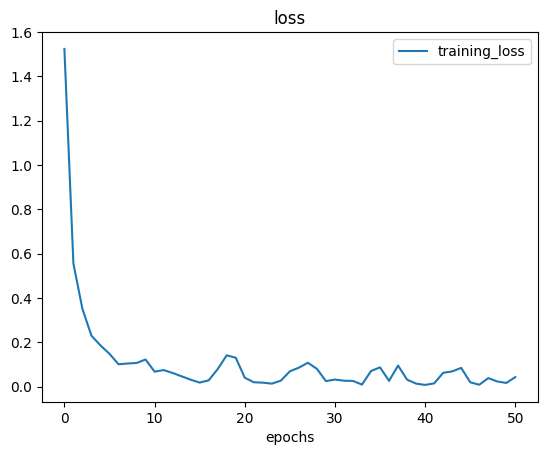

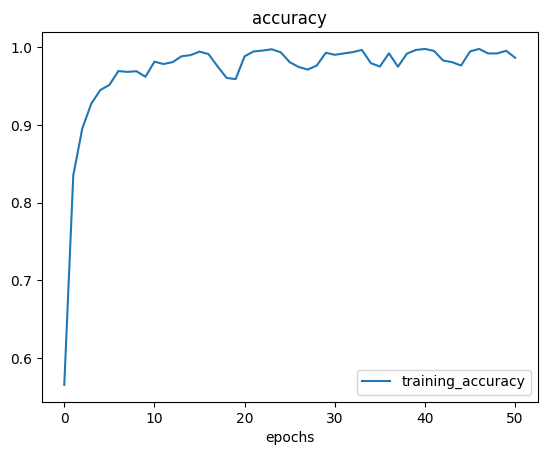

In [ ]:
# model_InceptionResNetV2_Histo = model_InceptionResNetV2.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
# model_InceptionResNetV2.save(path2+'/model_InceptionResNetV2.keras')
# plot_loss_curves(model_InceptionResNetV2_Histo)

## VGG16

In [ ]:
# model_VGG16_Histo = model_VGG16.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
# model_VGG16.save(path2+'/model_VGG16.keras')
# plot_loss_curves(model_VGG16_Histo)

Epoch 1/100
73/73 [==============================] - 3380s 46s/step - loss: 4.8793 - accuracy: 0.0401 - val_loss: 3.3951 - val_accuracy: 0.0466 - duration: 3379.5986
Epoch 2/100
73/73 [==============================] - 90s 1s/step - loss: 3.4026 - accuracy: 0.0459 - val_loss: 3.3952 - val_accuracy: 0.0466 - duration: 90.0496
Epoch 3/100
73/73 [==============================] - 85s 1s/step - loss: 3.3808 - accuracy: 0.0470 - val_loss: 3.3415 - val_accuracy: 0.0502 - duration: 84.5354
Epoch 4/100
73/73 [==============================] - 86s 1s/step - loss: 3.2452 - accuracy: 0.0630 - val_loss: 3.2862 - val_accuracy: 0.0735 - duration: 86.1636
Epoch 5/100
73/73 [==============================] - 86s 1s/step - loss: 3.1153 - accuracy: 0.0865 - val_loss: 3.2378 - val_accuracy: 0.0806 - duration: 86.4555
Epoch 6/100
73/73 [==============================] - 87s 1s/step - loss: 2.9945 - accuracy: 0.1108 - val_loss: 3.3643 - val_accuracy: 0.0753 - duration: 87.2026
Epoch 7/100
73/73 [==========

Epoch 1/100
73/73 [==============================] - 1542s 21s/step - loss: 2.1540 - accuracy: 0.3859 - val_loss: 1.8399 - val_accuracy: 0.4659 - duration: 1541.4950
Epoch 2/100
73/73 [==============================] - 84s 1s/step - loss: 1.2638 - accuracy: 0.6188 - val_loss: 1.5654 - val_accuracy: 0.5645 - duration: 84.0300
Epoch 3/100
73/73 [==============================] - 80s 1s/step - loss: 0.8717 - accuracy: 0.7307 - val_loss: 1.5669 - val_accuracy: 0.5699 - duration: 80.2855
Epoch 4/100
73/73 [==============================] - 80s 1s/step - loss: 0.6086 - accuracy: 0.8150 - val_loss: 1.3678 - val_accuracy: 0.6380 - duration: 79.6678
Epoch 5/100
73/73 [==============================] - 82s 1s/step - loss: 0.4508 - accuracy: 0.8611 - val_loss: 1.4699 - val_accuracy: 0.6398 - duration: 81.6792
Epoch 6/100
73/73 [==============================] - 81s 1s/step - loss: 0.3556 - accuracy: 0.8892 - val_loss: 1.5716 - val_accuracy: 0.6219 - duration: 81.3022
Epoch 7/100
73/73 [==========

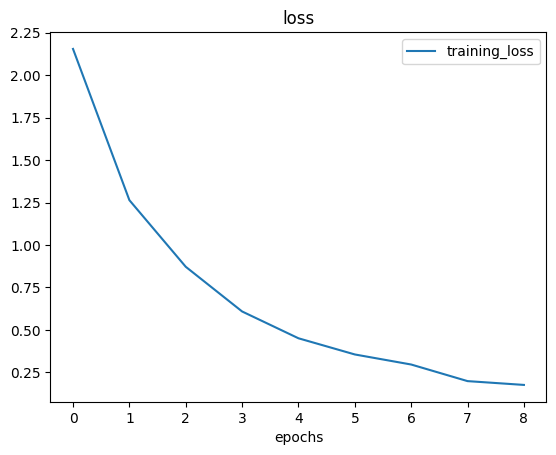

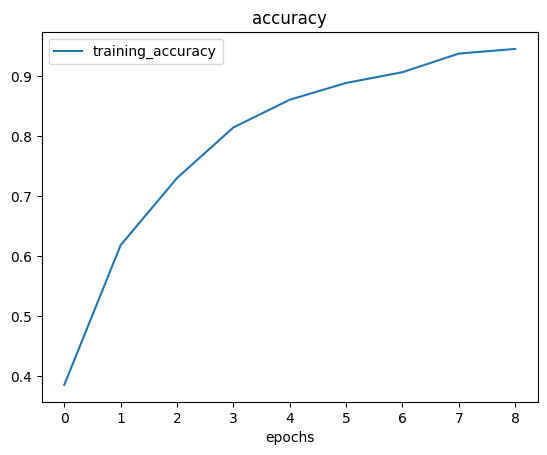

In [ ]:
# model_Resnet50V2_Histo = model_RESNET50V2.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
# model_RESNET50V2.save(path2+'/model_RESNET50V2.keras')
# plot_loss_curves(model_Resnet50V2_Histo)

In [ ]:
# model_DenseNet201_Histo = model_DenseNet201.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
# model_DenseNet201.save(path2+'/model_DenseNet201.keras')
# plot_loss_curves(model_DenseNet201_Histo)

Epoch 1/100
  6/145 [>.............................] - ETA: 1:11 - loss: 19.0772 - accuracy: 0.0156

145/145 [==============================] - 128s 719ms/step - loss: 4.0315 - accuracy: 0.0448 - val_loss: 3.3218 - val_accuracy: 0.0663 - duration: 127.8556
Epoch 2/100
145/145 [==============================] - 84s 574ms/step - loss: 3.1522 - accuracy: 0.0744 - val_loss: 3.2674 - val_accuracy: 0.0556 - duration: 83.7738
Epoch 3/100
145/145 [==============================] - 84s 575ms/step - loss: 3.0071 - accuracy: 0.1113 - val_loss: 3.1300 - val_accuracy: 0.1111 - duration: 83.7090
Epoch 4/100
145/145 [==============================] - 85s 584ms/step - loss: 2.7925 - accuracy: 0.1563 - val_loss: 3.0538 - val_accuracy: 0.1237 - duration: 85.1329
Epoch 5/100
145/145 [==============================] - 85s 586ms/step - loss: 2.6635 - accuracy: 0.2050 - val_loss: 2.8832 - val_accuracy: 0.1792 - duration: 85.1649
Epoch 6/100
145/145 [==============================] - 84s 579ms/step - loss: 2.4893 - accuracy: 0.2492 - val_loss: 2.8816 - val_accuracy: 0.1882 - duration: 84.1597
Epoch 7/100
14

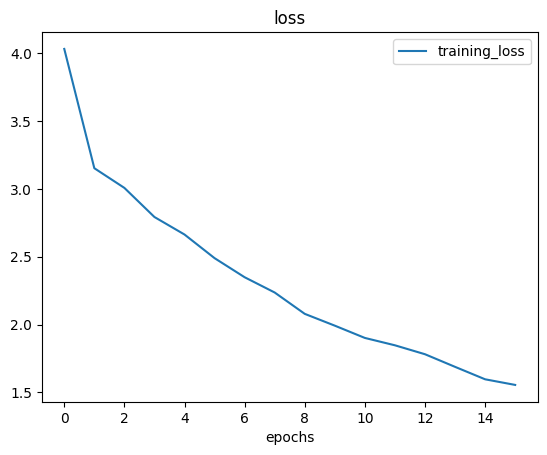

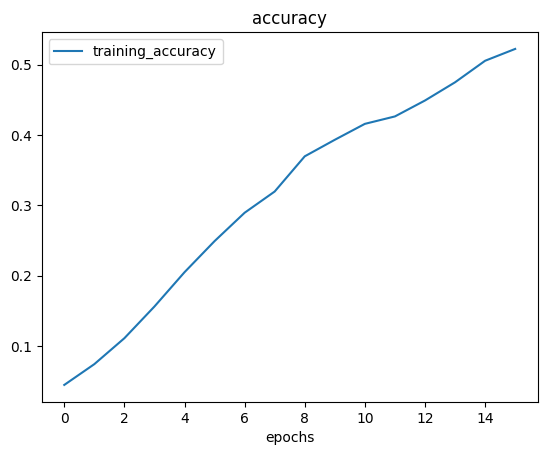

In [ ]:
model_VGG19_Histo = model_VGG19.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_VGG19.save(path2+'/model_VGG19.keras')
plot_loss_curves(model_VGG19_Histo)

Epoch 1/100
145/145 [==============================] - 129s 587ms/step - loss: 2.2887 - accuracy: 0.3489 - val_loss: 2.1401 - val_accuracy: 0.3996 - duration: 129.2030
Epoch 2/100
145/145 [==============================] - 75s 516ms/step - loss: 1.4521 - accuracy: 0.5757 - val_loss: 1.7445 - val_accuracy: 0.5233 - duration: 75.0173
Epoch 3/100
145/145 [==============================] - 76s 520ms/step - loss: 1.0411 - accuracy: 0.6971 - val_loss: 1.6328 - val_accuracy: 0.5448 - duration: 75.5190
Epoch 4/100
145/145 [==============================] - 76s 521ms/step - loss: 0.8701 - accuracy: 0.7385 - val_loss: 1.6013 - val_accuracy: 0.5663 - duration: 75.7012
Epoch 5/100
145/145 [==============================] - 77s 527ms/step - loss: 0.6732 - accuracy: 0.7984 - val_loss: 1.4104 - val_accuracy: 0.6201 - duration: 76.5541
Epoch 6/100
145/145 [==============================] - 76s 519ms/step - loss: 0.5814 - accuracy: 0.8260 - val_loss: 1.4485 - val_accuracy: 0.6344 - duration: 75.5711
Ep

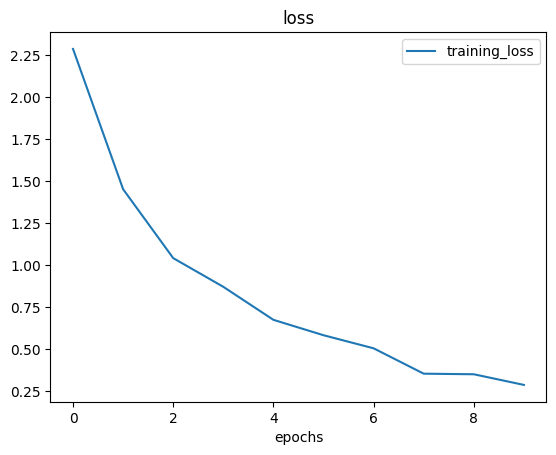

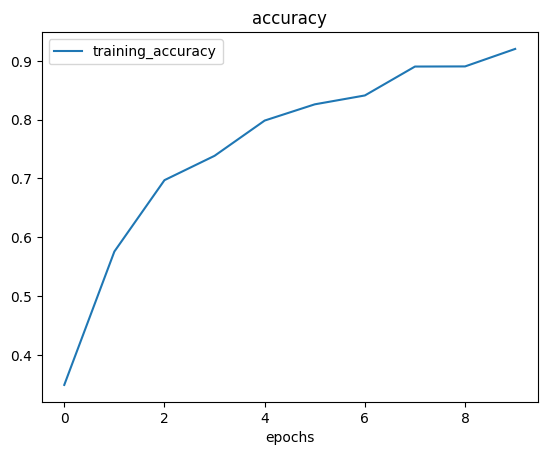

In [ ]:
model_InceptionV3_Histo = model_InceptionV3.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_InceptionV3.save(path2+'/model_InceptionV3.keras')
plot_loss_curves(model_InceptionV3_Histo)

Epoch 1/100
  6/145 [>.............................] - ETA: 1:10 - loss: 3.4074 - accuracy: 0.0833

145/145 [==============================] - 130s 676ms/step - loss: 1.8239 - accuracy: 0.4812 - val_loss: 1.2932 - val_accuracy: 0.6344 - duration: 130.4184
Epoch 2/100
145/145 [==============================] - 87s 596ms/step - loss: 0.8469 - accuracy: 0.7540 - val_loss: 1.1701 - val_accuracy: 0.6953 - duration: 86.7617
Epoch 3/100
145/145 [==============================] - 86s 591ms/step - loss: 0.5573 - accuracy: 0.8387 - val_loss: 1.1627 - val_accuracy: 0.7097 - duration: 85.8738
Epoch 4/100
145/145 [==============================] - 91s 628ms/step - loss: 0.3994 - accuracy: 0.8855 - val_loss: 1.1640 - val_accuracy: 0.6918 - duration: 91.2547
Epoch 5/100
145/145 [==============================] - 87s 600ms/step - loss: 0.3190 - accuracy: 0.9094 - val_loss: 1.0876 - val_accuracy: 0.7097 - duration: 87.4536
Epoch 6/100
145/145 [==============================] - 91s 622ms/step - loss: 0.2751 - accuracy: 0.9219 - val_loss: 1.1134 - val_accuracy: 0.7115 - duration: 90.5392
Epoch 7/100
14

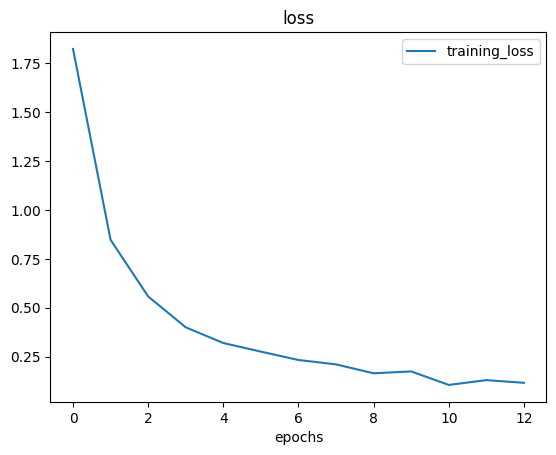

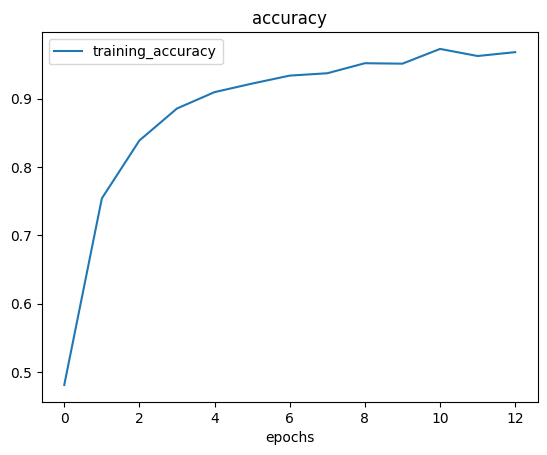

In [ ]:
model_Xception_Histo = model_Xception.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_Xception.save(path2+'/model_Xception.keras')
plot_loss_curves(model_Xception_Histo)

Epoch 1/100
145/145 [==============================] - 112s 528ms/step - loss: 1.4220 - accuracy: 0.5968 - val_loss: 1.0764 - val_accuracy: 0.6756 - duration: 111.7354
Epoch 2/100
145/145 [==============================] - 71s 491ms/step - loss: 0.5568 - accuracy: 0.8277 - val_loss: 0.9370 - val_accuracy: 0.7312 - duration: 71.1341
Epoch 3/100
145/145 [==============================] - 71s 487ms/step - loss: 0.3600 - accuracy: 0.8913 - val_loss: 1.0419 - val_accuracy: 0.7527 - duration: 70.5823
Epoch 4/100
145/145 [==============================] - 73s 506ms/step - loss: 0.2319 - accuracy: 0.9314 - val_loss: 0.9198 - val_accuracy: 0.7455 - duration: 73.3498
Epoch 5/100
145/145 [==============================] - 71s 490ms/step - loss: 0.2609 - accuracy: 0.9258 - val_loss: 1.0790 - val_accuracy: 0.7204 - duration: 71.3263
Epoch 6/100
145/145 [==============================] - 72s 494ms/step - loss: 0.1766 - accuracy: 0.9450 - val_loss: 1.1356 - val_accuracy: 0.7079 - duration: 71.6473
Ep

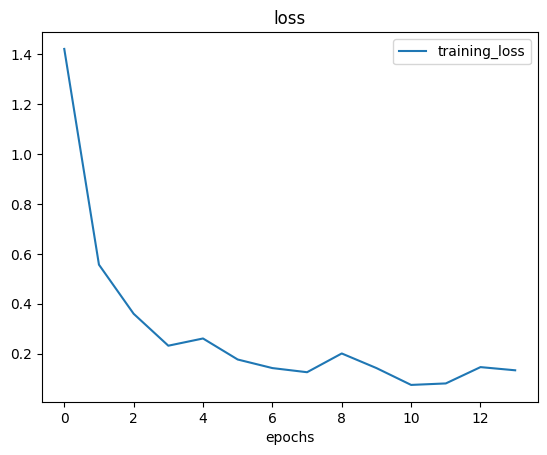

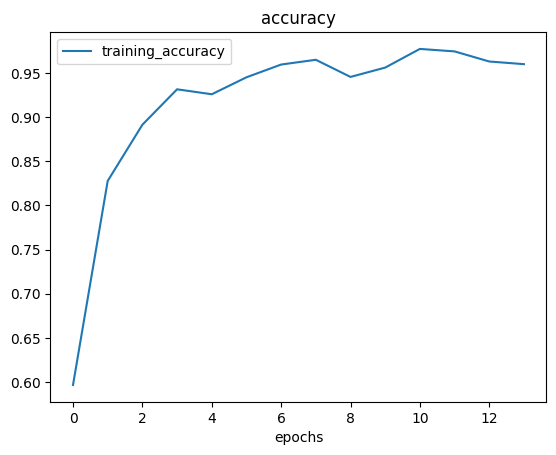

In [ ]:
model_MobileNetV3Large_Histo = model_MobileNetV3Large.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_MobileNetV3Large.save(path2+'/model_MobileNetV3Large.keras')
plot_loss_curves(model_MobileNetV3Large_Histo)